<a href="https://colab.research.google.com/github/jogepa/License_plate_detection/blob/main/Characters_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import requiered dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np

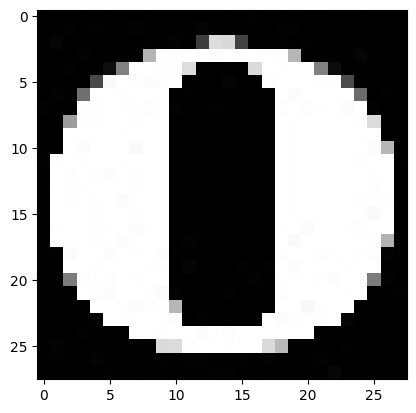

In [2]:
#sample image
img = cv2.imread('/content/drive/Shareddrives/Character_images/data/train/class_0/class_0_10.jpg')
plt.imshow(img)
plt.show()

In [3]:
img.shape

(28, 28, 3)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/Shareddrives/Character_images/data/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        '/content/drive/Shareddrives/Character_images/data/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='categorical')

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


### Creating the architecture of the neural net. 


In [6]:
model = Sequential()
model.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

optimizer = optimizers.Adam(learning_rate = 0.00001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

In [7]:
class stop_training_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs.get('val_acc')
        if val_acc is not None and val_acc > 0.992:
            self.model.stop_training = True

In [ ]:
import datetime
!rm -rf logs
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Training

In [ ]:
batch_size = 1
callbacks = [stop_training_callback()]
history = model.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 80,
      callbacks=callbacks)

In [ ]:
model_name = 'single_Conv2D_24by24.h5'

In [ ]:
model.save(model_name)
print('Model saved to disk.')

Model saved to disk.


In [ ]:
%cd drive/Shareddrives/Character_images/

[Errno 2] No such file or directory: 'drive/Shareddrives/Character_images/'
/content/drive/Shareddrives/Character_images


In [ ]:
path = F"/content/drive/Shareddrives/Character_images/{model_name}" 
model.save(model_name, path)
print('Model saved to google drive.')

Model saved to google drive.


In [ ]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history5.history) 

# save to csv: 
hist_csv_file = F'history_{model_name}.csv'
path = F"/content/drive/Shareddrives/Character_images/{hist_csv_file}" 
hist_df.to_csv(path, index=False)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(model_name)
print("Loaded model from disk")

Loaded model from disk


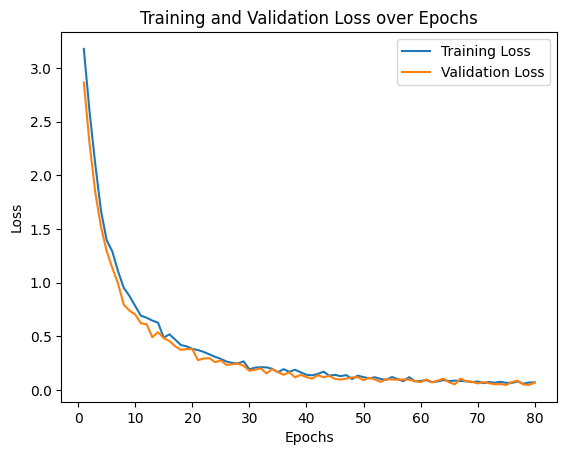

In [ ]:
# Extract the training loss and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training loss and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

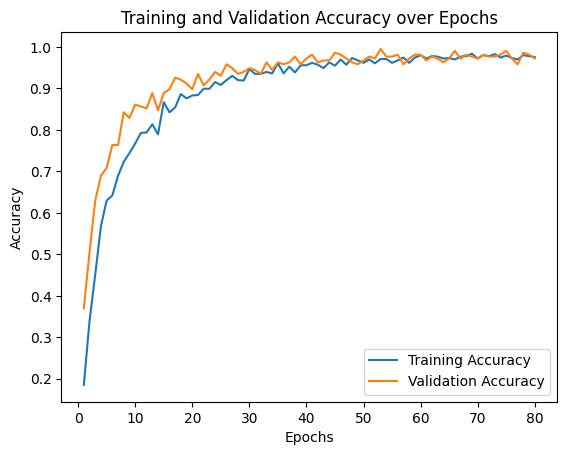

In [ ]:
# Extract the training accuracy and validation accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training accuracy oss and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

## Second approach 

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
model2.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
model2.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(36, activation='softmax'))

optimizer = optimizers.Adam(learning_rate = 0.00001)
model2.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

In [ ]:
class stop_training_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs.get('val_acc')
        if val_acc is not None and val_acc > 0.992:
            self.model2.stop_training = True

In [ ]:
batch_size = 1
callbacks = [tensorboard_callback, stop_training_callback()]
history2 = model2.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 80)

Epoch 1/80
864/864 [==============================] - 314s 361ms/step - loss: 3.4425 - accuracy: 0.0845 - val_loss: 2.9754 - val_accuracy: 0.1944
Epoch 2/80
864/864 [==============================] - 243s 281ms/step - loss: 2.5015 - accuracy: 0.2894 - val_loss: 1.9413 - val_accuracy: 0.5324
Epoch 3/80
864/864 [==============================] - 241s 279ms/step - loss: 1.7843 - accuracy: 0.4676 - val_loss: 1.4035 - val_accuracy: 0.6343
Epoch 4/80
864/864 [==============================] - 240s 278ms/step - loss: 1.4057 - accuracy: 0.5590 - val_loss: 1.1647 - val_accuracy: 0.6667
Epoch 5/80
864/864 [==============================] - 242s 280ms/step - loss: 1.0757 - accuracy: 0.6516 - val_loss: 0.7927 - val_accuracy: 0.7824
Epoch 6/80
864/864 [==============================] - 242s 280ms/step - loss: 0.9304 - accuracy: 0.6782 - val_loss: 0.6830 - val_accuracy: 0.8102
Epoch 7/80
864/864 [==============================] - 247s 286ms/step - loss: 0.7440 - accuracy: 0.7639 - val_loss: 0.5673 -

In [ ]:
%cd /content/
model_name2 = '3_Conv2D_24by24+2_20by20.h5'
model2.save(model_name2)
print('Model saved to disk.')

/content
Model saved to disk.


In [ ]:
%cd drive/Shareddrives/Character_images/
path = F"/content/drive/Shareddrives/Character_images/{model_name2}" 
model2.save(model_name2, path)
print('Model saved to google drive.')

/content/drive/Shareddrives/Character_images
Model saved to google drive.


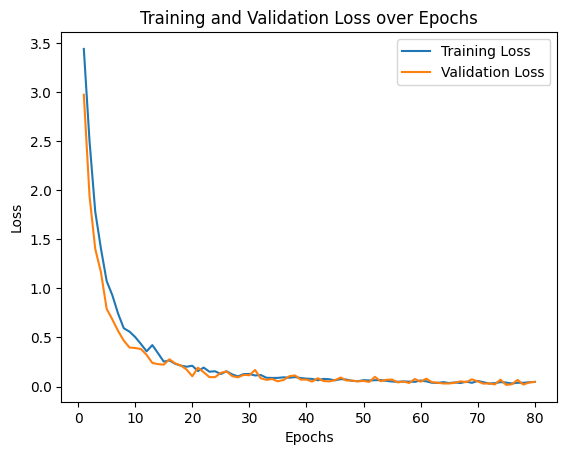

In [ ]:
# Extract the training loss and validation loss values from the history object
train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

# Plot the training loss and validation loss
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, label='Training Loss')
plt.plot(epochs, val_loss2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

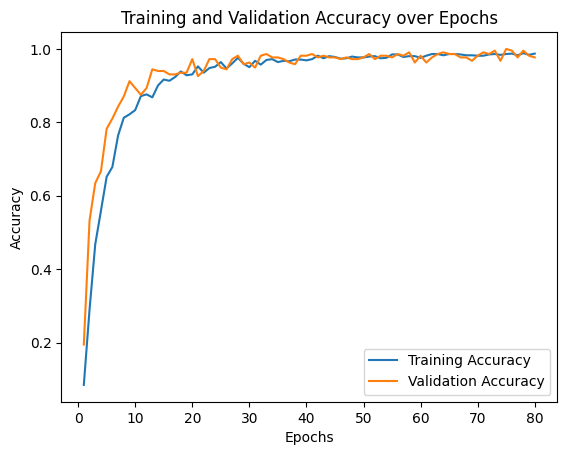

In [ ]:
# Extract the training accuracy and validation accuracy values from the history object
train_accuracy2 = history2.history['accuracy']
val_accuracy2 = history2.history['val_accuracy']

# Plot the training accuracy oss and validation accuracy
epochs = range(1, len(train_accuracy2) + 1)
plt.plot(epochs, train_accuracy2, label='Training Accuracy')
plt.plot(epochs, val_accuracy2, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

## Third Approach

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (7,7), input_shape=(28, 28, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (7,7), input_shape=(28, 28, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (7,7), input_shape=(28, 28, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(36, activation='softmax'))

optimizer = optimizers.Adam(learning_rate = 0.00001)
model3.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

In [ ]:
class stop_training_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs.get('val_acc')
        if val_acc is not None and val_acc > 0.992:
            self.model3.stop_training = True

In [ ]:
batch_size = 1
callbacks = [stop_training_callback()]
history3 = model3.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 80, 
      callbacks= callbacks)

Epoch 1/80
864/864 [==============================] - 10s 9ms/step - loss: 3.5603 - accuracy: 0.0440 - val_loss: 3.4771 - val_accuracy: 0.1620
Epoch 2/80
864/864 [==============================] - 7s 8ms/step - loss: 3.3093 - accuracy: 0.1354 - val_loss: 2.9134 - val_accuracy: 0.3102
Epoch 3/80
864/864 [==============================] - 7s 8ms/step - loss: 2.5497 - accuracy: 0.2963 - val_loss: 1.9725 - val_accuracy: 0.5324
Epoch 4/80
864/864 [==============================] - 8s 9ms/step - loss: 1.9622 - accuracy: 0.4271 - val_loss: 1.4923 - val_accuracy: 0.6528
Epoch 5/80
864/864 [==============================] - 7s 8ms/step - loss: 1.5646 - accuracy: 0.5428 - val_loss: 1.1888 - val_accuracy: 0.6991
Epoch 6/80
864/864 [==============================] - 8s 9ms/step - loss: 1.2670 - accuracy: 0.6111 - val_loss: 1.0060 - val_accuracy: 0.7500
Epoch 7/80
864/864 [==============================] - 9s 11ms/step - loss: 1.1207 - accuracy: 0.6620 - val_loss: 0.8775 - val_accuracy: 0.7685
Epoc

In [ ]:
%cd /content/
model_name3 = '3_Conv2D_7by7.h5'
model3.save(model_name3)
print('Model saved to disk.')

/content
Model saved to disk.


In [ ]:
%cd drive/Shareddrives/Character_images/
path = F"/content/drive/Shareddrives/Character_images/{model_name3}" 
model3.save(model_name3, path)
print('Model saved to google drive.')

/content/drive/Shareddrives/Character_images
Model saved to google drive.


In [ ]:
# convert the history.history dict to a pandas DataFrame:     
hist_df3 = pd.DataFrame(history3.history) 

# save to csv: 
hist_csv_file3 = F'history_{model_name3}.csv'
path3 = F"/content/drive/Shareddrives/Character_images/{hist_csv_file3}" 
hist_df3.to_csv(path3, index=False)

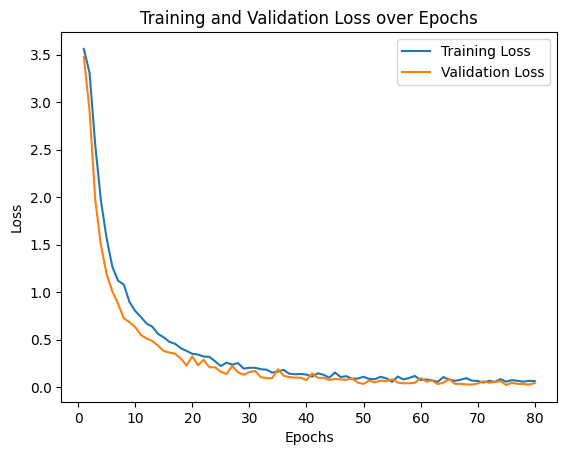

In [ ]:
# Extract the training loss and validation loss values from the history object
train_loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

# Plot the training loss and validation loss
epochs = range(1, len(train_loss3) + 1)
plt.plot(epochs, train_loss3, label='Training Loss')
plt.plot(epochs, val_loss3, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

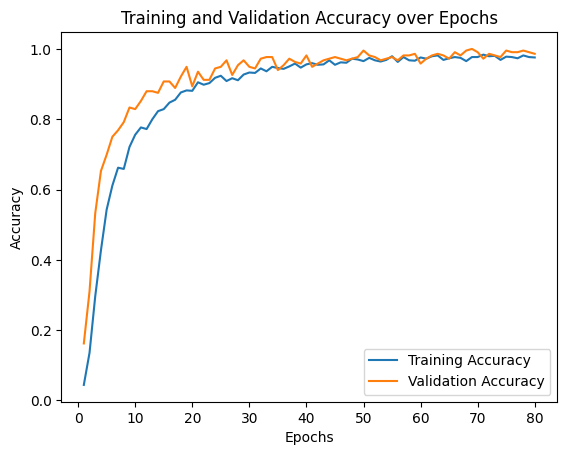

In [ ]:
# Extract the training accuracy and validation accuracy values from the history object
train_accuracy3 = history3.history['accuracy']
val_accuracy3 = history3.history['val_accuracy']

# Plot the training accuracy oss and validation accuracy
epochs = range(1, len(train_accuracy3) + 1)
plt.plot(epochs, train_accuracy3, label='Training Accuracy')
plt.plot(epochs, val_accuracy3, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

## 4th and last approach

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, (7,7), input_shape=(28, 28, 3), activation='relu', padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(36, activation='softmax'))

optimizer = optimizers.Adam(learning_rate = 0.00001)
model4.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

In [ ]:
class stop_training_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs.get('val_acc')
        if val_acc is not None and val_acc > 0.992:
            self.model4.stop_training = True

In [ ]:
batch_size = 1
callbacks = [stop_training_callback()]
history4 = model4.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 80, 
      callbacks= callbacks)

Epoch 1/80
864/864 [==============================] - 7s 7ms/step - loss: 3.5437 - accuracy: 0.0428 - val_loss: 3.4071 - val_accuracy: 0.2130
Epoch 2/80
864/864 [==============================] - 6s 7ms/step - loss: 3.3373 - accuracy: 0.1447 - val_loss: 3.1716 - val_accuracy: 0.3241
Epoch 3/80
864/864 [==============================] - 6s 7ms/step - loss: 3.0005 - accuracy: 0.2894 - val_loss: 2.7641 - val_accuracy: 0.4769
Epoch 4/80
864/864 [==============================] - 7s 8ms/step - loss: 2.5492 - accuracy: 0.4144 - val_loss: 2.2839 - val_accuracy: 0.5509
Epoch 5/80
864/864 [==============================] - 5s 6ms/step - loss: 2.0914 - accuracy: 0.5069 - val_loss: 1.7891 - val_accuracy: 0.7083
Epoch 6/80
864/864 [==============================] - 7s 8ms/step - loss: 1.7539 - accuracy: 0.5405 - val_loss: 1.5381 - val_accuracy: 0.7222
Epoch 7/80
864/864 [==============================] - 6s 6ms/step - loss: 1.4875 - accuracy: 0.6076 - val_loss: 1.2184 - val_accuracy: 0.7269
Epoch 

In [ ]:
%cd /content/
model_name4 = '1_Conv2D_7by7.h5'
model4.save(model_name4)
print('Model saved to disk.')

/content
Model saved to disk.


In [ ]:
%cd drive/Shareddrives/Character_images/
path = F"/content/drive/Shareddrives/Character_images/{model_name4}" 
model4.save(model_name4, path)
print('Model saved to google drive.')

/content/drive/Shareddrives/Character_images
Model saved to google drive.


In [ ]:
# convert the history.history dict to a pandas DataFrame:     
hist_df4 = pd.DataFrame(history4.history) 

# save to csv: 
hist_csv_file4 = F'history_{model_name4}.csv'
path4 = F"/content/drive/Shareddrives/Character_images/{hist_csv_file4}" 
hist_df4.to_csv(path4, index=False)

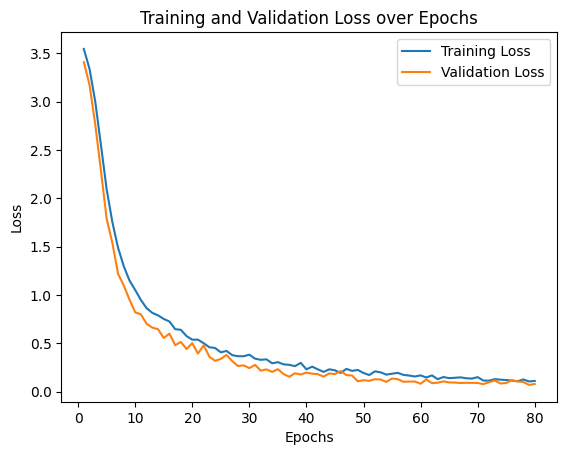

In [ ]:
# Extract the training loss and validation loss values from the history object
train_loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

# Plot the training loss and validation loss
epochs = range(1, len(train_loss4) + 1)
plt.plot(epochs, train_loss4, label='Training Loss')
plt.plot(epochs, val_loss4, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

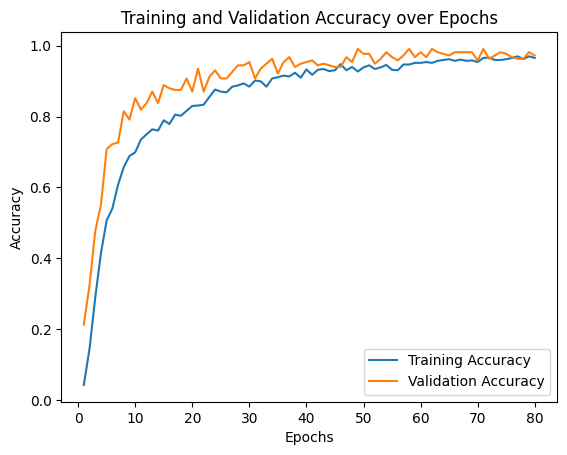

In [ ]:
# Extract the training accuracy and validation accuracy values from the history object
train_accuracy4 = history4.history['accuracy']
val_accuracy4 = history4.history['val_accuracy']

# Plot the training accuracy oss and validation accuracy
epochs = range(1, len(train_accuracy4) + 1)
plt.plot(epochs, train_accuracy4, label='Training Accuracy')
plt.plot(epochs, val_accuracy4, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

In [ ]:
# !kill 8400
#%load_ext tensorboard
#%tensorboard --logdir logs/fit

# Predict

In [ ]:
#  Load models
from tensorflow.keras.models import load_model

model_name = "single_Conv2D_24by24.h5"
model = load_model(model_name)
print("Loaded model from disk")

model_name2 = "3_Conv2D_24by24+2_20by20.h5"
model2 = load_model(model_name2)
print("Loaded model2 from disk")

model_name3 = "3_Conv2D_7by7.h5"
model3 = load_model(model_name3)
print("Loaded model3 from disk")

model_name4 = "1_Conv2D_7by7.h5"
model4 = load_model(model_name4)
print("Loaded model4 from disk")

Loaded model from disk
Loaded model2 from disk
Loaded model3 from disk
Loaded model4 from disk


In [ ]:
char = np.load('plate_chars.npy')

In [ ]:
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  
def predict_plate(X, model):
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(X): #iterating over the characters
        img_ = cv2.resize(ch, (28,28))
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        y_ = model.predict(img)[0] #predicting the class
        character = dic[np.where(y_>.99)[0][0]]
        output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number


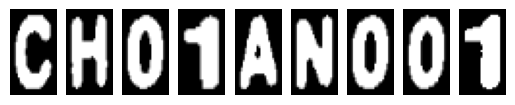

In [ ]:
for i in range(char.shape[0]):
    plt.subplot(1, char.shape[0], i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

In [ ]:
plate_output = predict_plate(char, model)
print("model = ", plate_output)

plate_output2 = predict_plate(char, model2)
print("model 2 = ",plate_output2)

plate_output3 = predict_plate(char, model3)
print("model 3 = ",plate_output3)

plate_output4 = predict_plate(char, model4)
print("model 4 =",plate_output4)

1/1 [==============================] - 0s 22ms/step
model =  CH01AN001
1/1 [==============================] - 0s 38ms/step
model 2 =  CH01AW001
1/1 [==============================] - 0s 35ms/step
model 3 =  CH01AN001
1/1 [==============================] - 0s 29ms/step
model 4 = CH01AN001


## Model Evaluation